# Vecinos cercanos

Hoy vamos a estudiar uno de los métodos más simples, poderosos e interesantes del arsenal de técnicas de machine learning: el método de los ***k* vecinos más cercanos**. 

Para motivar este método, recordemos el famoso adagio "*si camina como pato, suena como pato y nada como pato... muy posiblemente* ***es un pato***."

Retomemos nuestro dataset de **aprobados y reprobados**.


In [1]:
# Ejecutemos esta celda para cargar el dataset y las bibliotecas básicas
import matplotlib.pyplot as plt
import numpy as np
import math

horas_estudio = [5.25, 4.5, 1.75, 1.75, 1.5, 2.75, 3.75, 3.75, 2.75, 0.75, 3.5, 3.75, 2.5, 3.75, 2.75, 3.25, 1.5, 5.5, 4.5, 4.75, 3.25, 4.5, 2.5, 4.25, 3.75, 3.75, 6.5, 4.25, 4.25, 5.5, 3.75, 4.5, 3.5, 2.25, 6.25, 2.75, 4.75, 4.5, 1.75, 5.25, 3.25, 3.5, 5.25, 7.5, 4.25, 3.25, 5.25, 2.75, 3.25, 5.5, 3.75, 4.5, 3.25, 3.75, 1.25, 3.25, 6.25, 0.5, 4.5, 3.75, 7.25, 2.75, 5.75, 3.75, 3.75, 4.5, 3.25, 1.25, 5.5, 4.5, 1.5, 4.75, 3.5, 1.25, 2.5, 4.75, 2.25, 2.5, 2.25, 2.75, 4.75, 3.25, 3.25, 1.25, 4.25, 2.75, 1.25, 0.25, 4.75, 4.75, 3.75, 3.75, 4.75, 6.5, 5.25, 3.25, 2.25, 2.25, 6.25, 6.5]
horas_sueno = [4.75, 4.25, 5.5, 5.25, 4.5, 6.25, 7.5, 7.75, 5.25, 8.5, 5.75, 7.5, 7.75, 7.25, 7.5, 7.25, 4.25, 8.75, 4.75, 8.25, 6.75, 8.25, 5.75, 4.25, 5.25, 5.25, 7.75, 4.75, 6.5, 8.25, 6.5, 4.5, 7.75, 4.75, 5.5, 7.75, 7.25, 4.25, 6.75, 6.25, 5.75, 6.75, 7.25, 6.25, 4.5, 8.5, 7.5, 4.25, 4.5, 6.5, 5.5, 8.75, 6.25, 8.5, 4.5, 5.75, 4.5, 6.75, 8.5, 5.5, 6.75, 6.25, 5.25, 6.25, 4.5, 8.5, 4.75, 6.25, 5.25, 7.25, 5.25, 6.75, 7.25, 7.25, 8.5, 4.25, 4.75, 6.5, 8.25, 6.5, 4.5, 6.75, 5.75, 5.5, 5.5, 4.5, 4.5, 7.25, 8.25, 5.75, 4.75, 8.25, 5.25, 6.25, 5.5, 6.75, 7.75, 7.75, 4.25, 5.25]
resultado_examen = ['APROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'REPROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'APROBADO']

## Bosquejo del método *k*-NN

La intuición es muy simple. Dada un punto $\mathbf{x}$ que queremos clasificar y un dataset $D$, buscaremos los $k$ puntos **más parecidas** a $\mathbf{x}$ en $D$ y clasificaremos a $\mathbf{x}$ de acuerdo a la **etiqueta mayoritaria**. 

Para explicar esto mejor, grafiquemos nuestro dataset de aprobados y reprobados, los cuales se muestran en verde y rojo, respectivamente


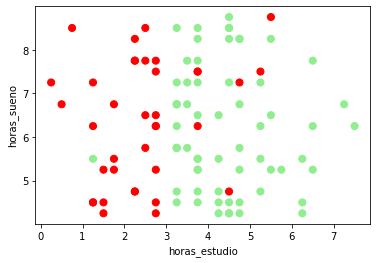

In [2]:
plt.scatter(horas_estudio, horas_sueno, c=['lightgreen' if x == 'APROBADO' else 'red' for x in resultado_examen], s=50)
plt.xlabel("horas_estudio")
plt.ylabel("horas_sueno")
plt.show()

Ahora, supongamos que vamos a clasificar a un individuo que estudió 3 horas y durmió 6 horas, utilizando el método *k-NN* donde el valor de $k=3$. El valor a clasificar está representado con una estrella negra y los tres vecinos más cercanos están indicados con un circulo alrededor. 

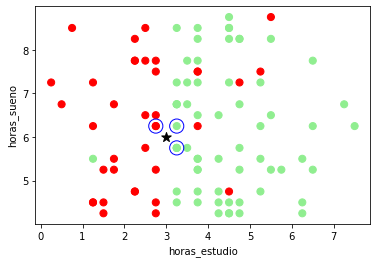

In [3]:
plt.scatter(horas_estudio, horas_sueno, c=['lightgreen' if x == 'APROBADO' else 'red' for x in resultado_examen], s=50)
plt.scatter(3, 6, c='black', marker='*', s=100)
plt.scatter(2.75, 6.25, marker='o', facecolors='none', edgecolors='blue', s=200)
plt.scatter(3.25, 5.75, marker='o', facecolors='none', edgecolors='blue', s=200)
plt.scatter(3.25, 6.25, marker='o', facecolors='none', edgecolors='blue', s=200)
plt.xlabel("horas_estudio")
plt.ylabel("horas_sueno")
plt.show()

Como podemos ver, los tres vecinos más cercanos al punto que queremos clasificar cuentan dos aprobados (verdes) y un reprobado (rojo). Por ende, clasificamos a este punto como **aprobado**. 

### Ingrediente: la función de distancia

Hasta ahora no hemos dado una definición clara de lo que significa un vecino **"cercano"**. Simplemente nos orientamos visualmente. Sin embargo, nuestro método requiere que utilicemos una **función de distancia** de la forma $\vec{d}\left(\mathbf{a},\mathbf{b}\right)$, la cual devuelve un número positivo que mide **qué tan distintos son** los vectores $\mathbf{a}$ y $\mathbf{b}$, siendo 0 indicativo de que no hay ninguna diferencia entre ellos, y mientras más alto sea más distintos son. 

La función $\vec{d}\left(\mathbf{a},\mathbf{b}\right)$ debe ser una **métrica**. Una métrica es una función que posee las siguientes características:

1. No-negatividad: $\vec{d}\left(\mathbf{a},\mathbf{b}\right) \ge 0$
2. Simetría: $\vec{d}\left(\mathbf{a},\mathbf{b}\right) = \vec{d}\left(\mathbf{b},\mathbf{a}\right)$
3. Identidad de los indiscernibles: $\vec{d}\left(\mathbf{a},\mathbf{a}\right) = 0$
4. Desigualdad de triangulos: $\vec{d}\left(\mathbf{a},\mathbf{c}\right) \le \vec{d}\left(\mathbf{a},\mathbf{b}\right)  + \vec{d}\left(\mathbf{b},\mathbf{c}\right)$

Una de las funciones de distancia más comunmente utilizadas es la **distancia euclideana**, también conocida como **norma** $L_2$, la cual está definida como $$\vec{d}_{\mathrm{Euclideana}}\left(\mathbf{a},\mathbf{b}\right) = \sqrt{\sum_{i=i}^{M} (a_i - b_i)^2}$$
Posteriormente veremos otras funciones de distancia.

Implementemos una distancia euclideana para nuestro ejemplo.

In [5]:
# Distancia euclideana para nuestro dataset de ejemplo
# Los puntos se definen como tuplas de la forma (horas_estudio, horas_sueno)
def distancia(punto_a, punto_b):
    (horas_estudio_a, horas_sueno_a) = punto_a
    (horas_estudio_b, horas_sueno_b) = punto_b
    
    return np.sqrt((horas_estudio_a - horas_estudio_b)**2 + (horas_sueno_a - horas_sueno_b)**2)

In [6]:
# Probemos nuestra función de distancia con algunos valores
punto_x = (3,4)
punto_y = (5,6)
punto_z = (8,9)

print('distancia(punto_x, punto_x) =', distancia(punto_x, punto_x))
print('distancia(punto_x, punto_y) =', distancia(punto_x, punto_y))
print('distancia(punto_y, punto_x) =', distancia(punto_y, punto_x))
print('distancia(punto_y, punto_z) =', distancia(punto_y, punto_z))
print('distancia(punto_x, punto_z) =', distancia(punto_x, punto_z))

distancia(punto_x, punto_x) = 0.0
distancia(punto_x, punto_y) = 2.8284271247461903
distancia(punto_y, punto_x) = 2.8284271247461903
distancia(punto_y, punto_z) = 4.242640687119285
distancia(punto_x, punto_z) = 7.0710678118654755


Con esto podemos crear nuestra función de clasificación ``es_aprobado``. Implementaremos una versión "ingénua" o simplificada del método k-NN.

In [7]:
# Colocamos el dataset como una lista de tuplas de la forma (horas_estudio, horas_sueno, resultado_examen)
todo_dataset = list(zip(horas_estudio, horas_sueno, resultado_examen))

# Definimos nuestra función de clasificación
def es_aprobado(mis_horas_estudio, mis_horas_sueno, k=3, datos=todo_dataset):
    
    mi_punto = (mis_horas_estudio, mis_horas_sueno)
    
    # Primero, calculamos la distancia de nuestro punto contra cada otro punto en el dataset
    # El resultado de esta operación es una lista de tuplas de la forma (distancia_hasta_x, resultado_x)
    todas_distancias = [ (distancia(mi_punto, (estudio_x, sueno_x)), label_x) for (estudio_x, sueno_x, label_x) in datos ]

    # Ahora, ordenamos la lista por distancia
    todas_distancias.sort(key=lambda x: x[0])
    
    # Tomamos las etiquetas de los k valores más cercanos
    k_etiquetas = [x[1] for x in todas_distancias[:k]]
    
    # Contamos las veces que aparecen
    # Esta operación devuelve una lista de la forma (resultado_examen, numero_vecinos)
    cuentas = ([ (x, k_etiquetas.count(x)) for x in set(k_etiquetas) ])
    
    # Y encontramos el máximo
    resultado = max(cuentas, key=lambda x: x[1])[0]
    return resultado

In [8]:
# Ahora, lo probaremos con algunos valores
print('(e=5,s=9) =', es_aprobado(5,9))
print('(e=0,s=8) =', es_aprobado(0,8))
print('(e=3,s=3) =', es_aprobado(3,3))
print('(e=5,s=6) =', es_aprobado(5,6))

(e=5,s=9) = APROBADO
(e=0,s=8) = REPROBADO
(e=3,s=3) = REPROBADO
(e=5,s=6) = APROBADO


### El valor de *k* 

A pesar de sus ventajas, el desempeño del método *k*-NN es sensible al valor de *k* que es escoja. No hay un valor perfecto para cada aplicación y es necesario probar empíricamente su desempeño con distintos valores. 

Sin embargo, podemos razonar sobre estos valores. El valor de $k$ estar entre 1 y $N$. Con $k=1$, clasificamos unicamente con respecto al vecino más cercano. Con $k=N$ utilizamos el dataset entero, lo que significa que terminaremos clasificando cualquier valor a la etiqueta más frecuente en el dataset. Véamos cómo se ve esto graficamente con nuestro dataset. 

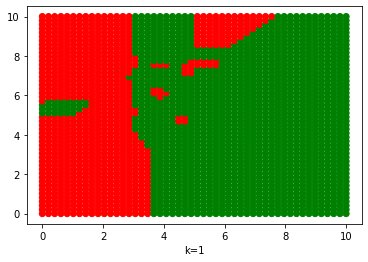

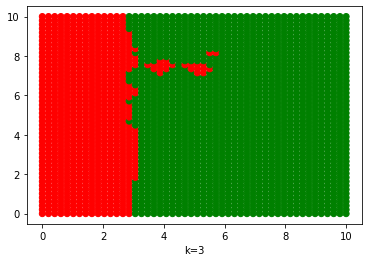

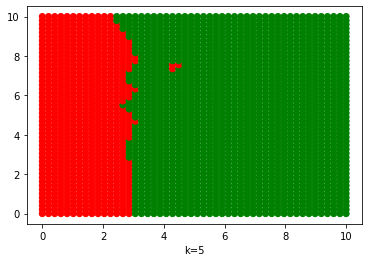

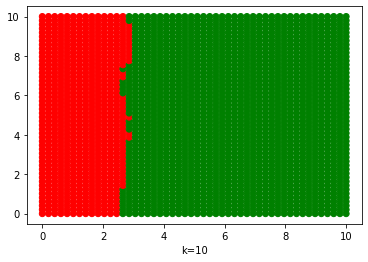

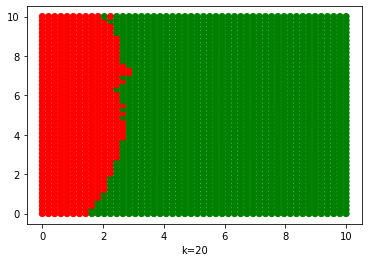

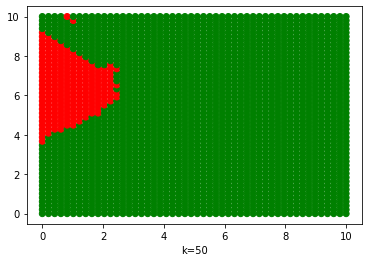

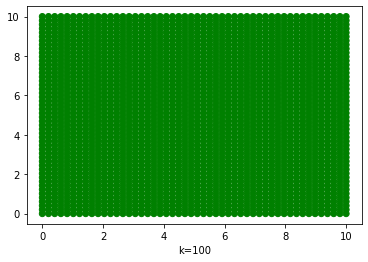

In [9]:
# Generamos un grid de valores para probar
XX, YY = np.meshgrid(np.linspace(0, 10, 50), np.linspace(0, 10, 50))
pos = np.vstack([XX.ravel(), YY.ravel()])

# Probaremos valores de k para 1, 3, 5, 10, 20, 50 y 100
k_a_probar = [1, 3, 5, 10, 20, 50, 100]

# Probamos y dibujamos
for val_k in k_a_probar:
    val_x = [ 'green' if es_aprobado(x[0], x[1], k=val_k) == 'APROBADO' else 'red' for x in pos.T ]
    plt.scatter(pos[0], pos[1],c=val_x)
    plt.xlabel("k=" +  str(val_k))
    plt.show()

Como podemos ver, un valor de $k=1$ produce límites de clasificación que parecen inestables, mientras que uno de $k=N$ clasifica a todos incorrectamente como ``APROBADO``. 

Hagamos una prueba con validación cruzada para ver la tasa de error para los distintos valores de $k$. 

[0.16000000000000003, 0.15000000000000002, 0.13, 0.12, 0.09999999999999998, 0.10999999999999999, 0.10999999999999999, 0.16000000000000003, 0.14, 0.15000000000000002, 0.15000000000000002, 0.18999999999999995, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.19999999999999996, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.18000000000000005, 0.17000000000000004, 0.18999999999999995, 0.19999999999999996, 0.19999999999999996, 0.17000000000000004, 0.18999999999999995, 0.16000000000000003, 0.18999999999999995, 0.16000000000000003, 0.18000000000000005, 0.18000000000000005, 0.18999999999999995, 0.18999999999999995, 0.21999999999999997, 0.19999999999999996, 0.20999999999999996, 0.20999999999999996, 0.25, 0.22999999999999998, 0.25, 0.24, 0.28, 0.26, 0.30000000000000004, 0.29000000000000004, 0.29000000000000004, 0.29000000000000004, 0.30000000000000004, 0.30000000000000004, 0.31000000000000005, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.3199

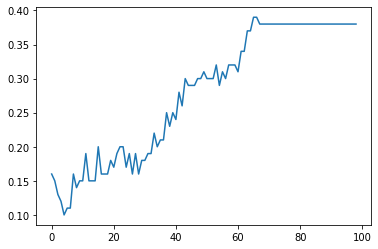

In [10]:
# lista para acumular las tasas de error
errores = []

# iteramos con los valores de k
for val_k in range(1,100):
    suma = 0.0
    
    # iteramos en todo el dataset
    for val_i in range(1,100):
        
        # tomamos el i-ésimo elemento para probar
        td_val = todo_dataset[val_i]
        
        # utilizamos el dataset menos el i-ésimo elemento como entrenamiento
        td_train = todo_dataset[:val_i] + todo_dataset[(val_i + 1):]
        
        # restamos 1% de error por cada valor correcto
        suma += 1 if es_aprobado(td_val[0], td_val[1], k=val_k, datos=td_train) == td_val[2] else 0

    errores.append(1.0 - (suma/100))
    
print(errores)
plt.plot(errores)

Como podemos ver, un valor de $k=5$ es óptimo. 

## Regresión con *k*-NN

Es posible hacer regresión con $k$-NN. Para ello, obtenemos el promedio de la variable dependiente (de salida) de los $k$ vecinos más cercanos. 

Consideremos el siguiente ejemplo. Tenemos un dataset que contiene la ``estatura`` (en cm) y ``peso`` (en kg) de distintas personas y queremos estimar el peso dada la estatura. 

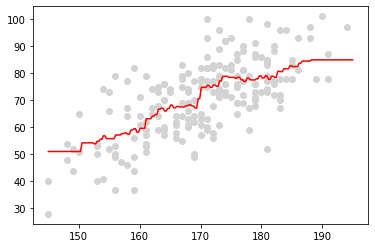

In [11]:
# Datos de peso y estatura
estatura = [159, 177, 160, 181, 172, 149, 160, 182, 170, 153, 181, 171, 190, 181, 164, 185, 163, 167, 176, 145, 178, 182, 170, 186, 164, 153, 177, 153, 155, 168, 182, 173, 166, 154, 179, 179, 174, 172, 170, 171, 176, 183, 160, 175, 173, 162, 174, 173, 170, 173, 176, 171, 159, 179, 148, 161, 194, 174, 169, 179, 185, 176, 172, 171, 171, 150, 179, 153, 166, 177, 178, 172, 154, 179, 155, 156, 149, 181, 159, 161, 177, 173, 170, 181, 161, 164, 171, 178, 158, 145, 156, 164, 174, 159, 167, 171, 182, 179, 166, 161, 164, 176, 183, 168, 169, 173, 166, 176, 170, 173, 173, 169, 161, 163, 170, 161, 184, 164, 179, 176, 181, 173, 185, 167, 174, 168, 183, 170, 172, 158, 188, 171, 173, 156, 184, 158, 161, 167, 150, 159, 180, 171, 162, 174, 167, 177, 172, 163, 169, 168, 174, 179, 171, 191, 166, 163, 167, 181, 175, 177, 157, 176, 168, 178, 175, 161, 179, 169, 167, 155, 148, 171, 189, 174, 188, 181, 181, 156, 175, 169, 156, 168, 165, 163, 182, 177, 162, 180, 183, 158, 165, 164, 170, 172, 168, 161, 183, 186, 191, 168]
peso = [44, 81, 64, 84, 58, 52, 61, 90, 78, 53, 85, 77, 101, 83, 70, 85, 75, 83, 69, 28, 79, 88, 75, 93, 76, 54, 77, 50, 73, 73, 72, 78, 62, 74, 70, 91, 72, 73, 78, 63, 75, 67, 71, 83, 61, 65, 82, 83, 82, 71, 85, 100, 82, 76, 48, 53, 97, 76, 70, 76, 78, 69, 56, 82, 82, 65, 87, 40, 61, 69, 59, 68, 41, 70, 52, 49, 44, 74, 56, 62, 90, 79, 61, 79, 59, 70, 75, 100, 67, 40, 50, 59, 73, 49, 79, 86, 77, 73, 58, 53, 57, 87, 78, 66, 77, 72, 64, 76, 65, 96, 73, 50, 54, 64, 57, 54, 78, 60, 86, 65, 77, 89, 83, 75, 92, 60, 70, 77, 77, 64, 93, 60, 74, 37, 96, 46, 79, 78, 51, 37, 86, 59, 67, 92, 64, 72, 82, 68, 49, 74, 73, 71, 82, 78, 56, 73, 69, 73, 81, 88, 47, 79, 61, 67, 71, 57, 68, 64, 55, 66, 54, 93, 78, 76, 97, 98, 52, 79, 93, 62, 53, 69, 73, 59, 76, 81, 74, 73, 72, 77, 74, 76, 63, 83, 63, 51, 96, 81, 87, 80]

# Definimos nuestra función de regresión usando k-NN
def est_peso(mi_estatura, k=20):
    dists = [(np.sqrt((mi_estatura - x[0])**2), x[1]) for x in list(zip(estatura, peso))]
    dists.sort(key=lambda x: x[0])
    
    k_vals = np.array([x[1] for x in dists[:k]])
    return k_vals.mean()

# Datos de prueba
vx = np.linspace(145,195,200)

# Dibujamos la línea de regresión superpuesta en los datos
plt.scatter(estatura,peso,c='lightgray')
plt.plot(vx, [ est_peso(x,k=20) for x in vx ], c='red')

## Otras funciones de distancia

Existen otras funciones de distancia que nos pueden ser más convenientes de acuerdo a los datos que estemos utilizando. 

### Distancia euclideana normalizada

Un problema con la distancia euclideana es que podemos tener datos con unidades en distintos órdenes de magnitud. Por ejemplo, si tenemos datos de la forma ``(edad, salario)``, donde ``edad`` es un número entre 0 y 120 y ``salario`` es un número entre 0 y 999,999,999 tendríamos el siguiente problema: a la hora de calcular distancias, la variable ``salario`` tendría **mucho más peso** que ``edad`` a la hora de determinar qué tan distantes son estos dos valores.

Este problema se puede resolver **normalizando los datos** (con media y desviación estándar) a la hora de pre-procesarlos y **normalizando cada valor de entrada a nuestra función** de clasificación o regresión. O bien utilizando la **distancia euclideana normalizada**, tambien llamada **estandarizada**: $$\vec{d}\left(\mathbf{a},\mathbf{b}\right) = \sqrt{\sum_{i=1}^{M} \frac{(a_i - b_i)^2}{\sigma_i^2}}$$

donde $\sigma_i^2$ es la **desviación estándar** $i$-ésima columna en el dataset.

### Distancias Manhattan y Minkowski

La distancia Manhattan (también conocida como **norma** $L_1$) es similar a la euclideana, pero en vez de elevar al cuadrado y obtener la raíz de la suma, simplemente utilizamos valores absolutos: $$\vec{d}\left(\mathbf{a},\mathbf{b}\right) = {\sum_{i=1}^{M} {\mid a_i - b_i \mid}}$$ La siguiente figura nos ilustra la diferencia entre las distancias euclideana y Manhattan, siendo la primera "circular" y la segunda "cuadrada" ([Fuente](https://link.springer.com/article/10.1007/s10462-019-09712-9/figures/3))

<img src="img/Manhattan_Euclideana.png" width="200">

Tanto la distancia euclideana como la Manhattan son **casos especiales** de la denominada **distancia Minkowski**, definida como $$\vec{d}\left(\mathbf{a},\mathbf{b}\right) = \left({\sum_{i=1}^{M} {\mid a_i - b_i \mid}^p}\right)^{\frac{1}{p}}$$

siendo la distancia euclideana la correspondiente a $p=2$ y la Manhattan a $p=1$.

### Distancias con datos categóricos 

Cuando tenemos datos categóricos (p.ej. sexo, provincia), tenemos la opción de utilizar **one-hot encoding** para hacer numéricos nuestros datos y luego utilizar la distancia euclideana. Otra opción es utilizar funciones como

$$\vec{d}\left(\mathbf{a},\mathbf{b}\right) = \sum_{i=1}^{M} \delta\left(a_i, b_i \right)$$ donde $$\delta(x,y) = \cases{0 \textrm{ si } x=y, \\ 1\textrm { si } x\ne y}$$.

Existen una gran cantidad de variantes de esta función de distancia, en las que, por ejemplo, el valor de $\delta(x,y)$ se ajusta a la frecuencia relativa de los valores de $x$ y $y$ en caso de que $x \ne y$. Una manera de ver esto es imaginarnos un dataset en el que el **95% de los puntos son masculinos**. Intuitivamente, un punto con un valor **femenino debería tener un valor de distancia con bastante más peso**, por la diferencia de frecuencia que esto conlleva. 


## Desventajas de *k*-NN

*k*-NN es un método muy versátil y poderoso, pero tiene varias falencias que debemos detallar:

- Al ser un método en el que no se estiman parámetros en una fase de entrenamiento, tenemos que "cargar" con el dataset. Esto dificulta su uso en aplicaciones con datasets muy grandes.

- El método es vulnerable a la **maldición de la dimensionalidad** que estudiaremos pronto.


## *k*-NN con ``scikit-learn``

La clase de ``scikit-learn`` para hace clasificación *k*-NN es ``sklearn.neighbors.KNeighborsClassifier`` y sigue la misma convención de esta biblioteca.

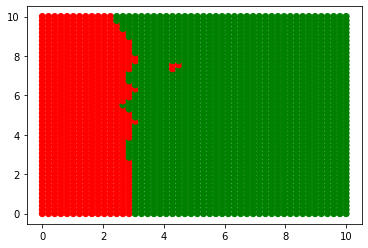

In [12]:
# Importamos la biblioteca
from sklearn.neighbors import KNeighborsClassifier

# Creamos el objeto knn donde definimos el valor de k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Hacemos el fit contra los datos
knn.fit(np.array((horas_estudio, horas_sueno)).T, resultado_examen)

# Lo evaluamos contra el grid de posiciones generadas anteriormente
preds = knn.predict(pos.T)

# Y lo dibujamos 
val_zzz = ['green' if x == 'APROBADO' else 'red' for x in preds ]
plt.scatter(pos[0], pos[1],c=val_zzz)

Para hacer regresión, la clase correspondiente es ``sklearn.neighbors.KNeighborsRegressor``.

Véamosla en acción.

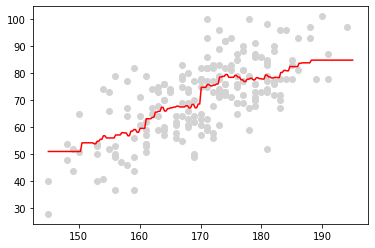

In [13]:
# Importamos la biblioteca
from sklearn.neighbors import KNeighborsRegressor

# Creamos el objeto kNN
knn = KNeighborsRegressor(n_neighbors=20, weights='uniform')

# Hacemos el fit de estatura contra peso
knn.fit(np.array([estatura]).T, peso)

# Hacemos las predicciones contra nuestros datos de ejemplo
vals = knn.predict(np.array([vx]).T)

# Dibujamos la línea de regresión
plt.scatter(estatura,peso,c='lightgray')
plt.plot(vx, vals, c='red')

## *k*-NN con Cross Validation (cross_val_score) 

In [15]:
# Importamos la biblioteca
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Creamos el objeto knn donde definimos el valor de k=5
knn = KNeighborsClassifier(n_neighbors=5)

# sacamos el cross val score
print(cross_val_score(knn, np.array((horas_estudio, horas_sueno)).T, resultado_examen, cv=5).mean())

0.89
